<a href="https://colab.research.google.com/github/yogesh966/Assignment--Python-web-scrapping-Justwatch.com-/blob/main/nNumerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [2]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [3]:
#import all necessary labraries

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import re


## **Scrapping Movies Data**

In [5]:
def fetch_movie_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_data(url)



## **Scrapping Movie Title**

In [ ]:
# Movie title

movie_title_list=[]# List to store all movie title

# Extracting all movie titles from  tag and storing them in movie_titles
movie_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})


# Extracting each movie title from movie_titles and storing in movie_title_list
for i in range(0,15):

    # Extract the 'href' attribute value, which contains the movie title
    data_id_value = movie_titles[i]['href']

    # Removing the '/in/movie/' prefix to get the clean movie title
    data_id_value = data_id_value.replace("/in/movie/","")

    # Converting the movie title to uppercase and appending to the list
    movie_title_list.append(data_id_value.upper())

movie_title_list

['STREE-2',
 'PROJECT-K',
 'KILL-2024',
 'MUNJHA',
 'STREE',
 'SIDDHARTH-ROY',
 'MAHARAJA-2024',
 'RAAYAN',
 'DEADPOOL-3',
 'LAILA-MAJNU',
 'CHANDU-CHAMPION',
 'PHIR-AAYI-HASSEEN-DILLRUBA',
 'BHEDIYA',
 'DOUBLE-ISMART',
 'GOLAM']

## **Fetching Movie URL's**

In [ ]:
# Movie url

movie_url_list=[] # List to store all movie urls

# For every movie title present in movies_title_list , Finding their url
for i in range(0,15):

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie_title_list[i]
    movie_url_list.append(absolute_url)

movie_url_list


['https://www.justwatch.com/in/movie/STREE-2',
 'https://www.justwatch.com/in/movie/PROJECT-K',
 'https://www.justwatch.com/in/movie/KILL-2024',
 'https://www.justwatch.com/in/movie/MUNJHA',
 'https://www.justwatch.com/in/movie/STREE',
 'https://www.justwatch.com/in/movie/SIDDHARTH-ROY',
 'https://www.justwatch.com/in/movie/MAHARAJA-2024',
 'https://www.justwatch.com/in/movie/RAAYAN',
 'https://www.justwatch.com/in/movie/DEADPOOL-3',
 'https://www.justwatch.com/in/movie/LAILA-MAJNU',
 'https://www.justwatch.com/in/movie/CHANDU-CHAMPION',
 'https://www.justwatch.com/in/movie/PHIR-AAYI-HASSEEN-DILLRUBA',
 'https://www.justwatch.com/in/movie/BHEDIYA',
 'https://www.justwatch.com/in/movie/DOUBLE-ISMART',
 'https://www.justwatch.com/in/movie/GOLAM']

## **Scrapping release Year**

In [ ]:
import time
# Movie release year
movie_release_year_list = []# List to store all movie release year

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request to the
    response_ry = requests.get(absolute_url,headers=headers)

        # Add a delay between requests to avoid getting blocked
    #time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response_ry.status_code != 200:
      print("Failed to retrieve the page, status code:", response_ry.status_code)

    else:
      soup_ry = BeautifulSoup(response_ry.text, 'html.parser')
      movie_release_block=soup_ry.find('div',class_='title-detail-hero__details')
      movie_release_year=movie_release_block.find('span',class_='release-year').text.strip()
      movie_release_year=movie_release_year.replace("(","")
      movie_release_year=movie_release_year.replace(")","")
      movie_release_year_list.append(movie_release_year)

print(movie_release_year_list)



['2024', '2024', '2024', '2024', '2018', '2024', '2024', '2024', '2024', '2018', '2024', '2024', '2022', '2024', '2024']


## **Scrapping Genres**

In [ ]:
# Movie genre

movie_genre_list = []# List to store all movie genre


headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request to the
    response = requests.get(absolute_url,headers=headers)

    # Add a delay between requests to avoid getting blocked
    time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response.status_code != 200:
      print("Failed to retrieve the page, status code:", response.status_code)

    else:
      soup = BeautifulSoup(response.text, 'html.parser')
      # Selecting only those h3 whose heading is genres
      h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')


      if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
          movie_genre_list.append(div_element.text.strip())
        else:
          movie_genre_list.append("Genre Not Listed")
      else:
        movie_genre_list.append("Genre Not Listed")

movie_genre_list

['Comedy, Horror',
 'Drama, Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Mystery & Thriller, Action & Adventure, Crime, Drama',
 'Comedy, Horror',
 'Horror, Comedy, Drama',
 'Drama, Romance',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Comedy, Science-Fiction, Action & Adventure',
 'Drama, Romance',
 'Drama, History, Sport, War & Military, Action & Adventure',
 'Mystery & Thriller, Crime, Drama, Romance',
 'Mystery & Thriller, Comedy, Horror',
 'Mystery & Thriller, Action & Adventure, Science-Fiction',
 'Crime']

## **Scrapping IMBD Rating**

In [ ]:
# Movie Imdb Rating

movie_imdb_list = []# List to store all movie imdb rating

# For every movie title present in movies_title_list , Finding their Imdb Rating
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request to the
    response = requests.get(absolute_url,headers=headers)

        # Add a delay between requests to avoid getting blocked
    time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response.status_code != 200:
      print("Failed to retrieve the page, status code:", response.status_code)

    else:
      soup = BeautifulSoup(response.text, 'html.parser')
         # Selecting only those h3 whose heading is Rating
      movie_block =soup.find('div',class_="title-detail-hero-details")
      if movie_block:
        img_tag= movie_block.find('img',class_="imdb-logo")

        if img_tag:

            main_span=img_tag.find_next_sibling('span')
            if main_span:
              movie_imdb_list.append(main_span.text.strip())
            else:
              movie_imdb_list.append(main_span.text.strip())


        else:
            movie_imdb_list.append(main_span.text.strip())

      else:
        movie_imdb_list.append(main_span.text.strip())



movie_imdb_list


['7.7 (22k)',
 '7.2 (53k)',
 '7.6 (24k)',
 '6.5 (20k)',
 '7.5 (41k)',
 '7.4 (2.3k)',
 '8.6 (44k)',
 '6.5 (7.3k)',
 '8.0 (272k)',
 '7.7 (6.3k)',
 '8.0 (30k)',
 '5.8 (5.2k)',
 '6.7 (26k)',
 '3.2 (1.2k)',
 '7.2 (2.7k)']

## **Scrapping Runtime/Duration**

In [ ]:
# Movie Runtime/Duration

movie_runtime_list=[]# List to store all movie runtime/duration

# For every movie title present in movies_title_list , Finding their Runtime/Duration
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request to the
    response = requests.get(absolute_url,headers=headers)

        # Add a delay between requests to avoid getting blocked
    #time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response.status_code != 200:
      print("Failed to retrieve the page, status code:", response.status_code)

    else:
      soup = BeautifulSoup(response.text, 'html.parser')
      # Selecting only those h3 whose heading is runtine
      h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

      if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_runtime_list.append(div_element.text.strip())
        else:
            movie_runtime_list.append("No Runtime/Duration mentioned")
      else:
        movie_runtime_list.append("No Runtime/Duration mentioned")

movie_runtime_list

['2h 27min',
 '2h 56min',
 '1h 45min',
 '2h 3min',
 '2h 7min',
 '2h 28min',
 '2h 21min',
 '2h 25min',
 '2h 8min',
 '2h 19min',
 '2h 22min',
 '2h 13min',
 '2h 36min',
 '2h 36min',
 '2h 0min']

## **Scrapping Age Rating**

In [ ]:
# Movie Age Rating

movie_age_rating_list = []# List to store all movie age rating

# For every movie title present in movies_title_list , Finding their Age Rating
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request to the
    response = requests.get(absolute_url,headers=headers)

        # Add a delay between requests to avoid getting blocked
    #time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response.status_code != 200:
      print("Failed to retrieve the page, status code:", response.status_code)

    else:
      soup = BeautifulSoup(response.text, 'html.parser')
      # Selecting only those h3 whose heading is Age rating
      h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

      if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_age_rating_list.append(div_element.text.strip())
        else:
            movie_age_rating_list.append("Age Rating Not Listed.")
      else:
         movie_age_rating_list.append("Age Rating Not Listed.")

movie_age_rating_list


['UA',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'Age Rating Not Listed.',
 'A',
 'A',
 'UA',
 'UA',
 'Age Rating Not Listed.',
 'UA',
 'UA',
 'UA']

## **Fetching Production Countries Details**

In [ ]:
# Movie Production Country

movie_production_country_list=[]# List to store all movie production country

# For every movie title present in movies_title_list , Finding their Production country
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request to the
    response = requests.get(absolute_url,headers=headers)

        # Add a delay between requests to avoid getting blocked
    #time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response.status_code != 200:
      print("Failed to retrieve the page, status code:", response.status_code)

    else:
      soup = BeautifulSoup(response.text, 'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
      h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

      if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_production_country_list.append(div_element.text.strip())
        else:
            movie_production_country_list.append("Production Country Not Listed")
      else:
        movie_production_country_list.append("Production Country Not Listed")

movie_production_country_list

['India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India']

## **Fetching Streaming Service Details**

In [ ]:
# Movie Streaming Service Platform

movie_streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
for i in range(0,15):

    # Constructing the absote URL for fetching each movie
    absolute_url ='https://www.justwatch.com/in/movie/' + movie_title_list[i]
    # Sending an HTTP GET request
    response = requests.get(absolute_url,headers=headers)

        # Add a delay between requests to avoid getting blocked
    #time.sleep(2)  # Adjust the delay as necessary (2 seconds is a reasonable start)

    # Parsing HTML content with Beautiful
    if response.status_code != 200:
      print("Failed to retrieve the page, status code:", response.status_code)

    else:
      soup = BeautifulSoup(response.text, 'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
      outer_div = soup.find('div', class_='buybox-row stream')

      if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
              img_element = picture_element.find('img')
              if img_element:
                alt_text = img_element['alt']
                movie_streaming_list.append(alt_text)
              else:
                movie_streaming_list.append("Not Available for Streaming.")
            else:
                movie_streaming_list.append("Not Available for Streaming.")
        else:
            movie_streaming_list.append("Not Available for Streaming.")
      else:
         movie_streaming_list.append("Not Available for Streaming.")

movie_streaming_list


['Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.',
 'Not Available for Streaming.']

## **Now Creating Movies DataFrame**

In [ ]:
# Creating Movies Dataframe

data_movies = {
    'Movie Title':movie_title_list,
    'IMDB Rating':movie_imdb_list,
    'Release Year':movie_release_year_list,
    'Genre':movie_genre_list,
    'Runtime/Duration':movie_runtime_list,
    'Age Rating':movie_age_rating_list,
    'Production Country':movie_production_country_list,
    'Streaming Platform':movie_streaming_list,
    'Url':movie_url_list
}

df_movies = pd.DataFrame(data_movies)


In [ ]:
df_movies

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,STREE-2,7.7 (22k),2024,"Comedy, Horror",2h 27min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/STREE-2
1,PROJECT-K,7.2 (53k),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",2h 56min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/PROJECT-K
2,KILL-2024,7.6 (24k),2024,"Mystery & Thriller, Action & Adventure, Crime,...",1h 45min,A,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/KILL-2024
3,MUNJHA,6.5 (20k),2024,"Comedy, Horror",2h 3min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/MUNJHA
4,STREE,7.5 (41k),2018,"Horror, Comedy, Drama",2h 7min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/STREE
5,SIDDHARTH-ROY,7.4 (2.3k),2024,"Drama, Romance",2h 28min,A,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/SIDDHARTH-ROY
6,MAHARAJA-2024,8.6 (44k),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",2h 21min,Age Rating Not Listed.,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/MAHARAJA-2024
7,RAAYAN,6.5 (7.3k),2024,"Action & Adventure, Drama, Mystery & Thriller",2h 25min,A,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/RAAYAN
8,DEADPOOL-3,8.0 (272k),2024,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,Not Available for Streaming.,https://www.justwatch.com/in/movie/DEADPOOL-3
9,LAILA-MAJNU,7.7 (6.3k),2018,"Drama, Romance",2h 19min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/LAILA-MAJNU


## **Scraping TV  Show Data**

In [ ]:
def fetch_tv_show_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup_tv=fetch_tv_show_data(url)


## **Fetching Tv Show Title's**



In [ ]:
# Tv Shows title

tv_show_title_list=[] # List to store all tv show title

# Extracting all tv show titles and storing them in tv_show_titles
tv_show_titles =soup_tv.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each tv show title from tv_show_titles and storing in tv_show_title_list
for i in range(0,15):

    # Extract the 'href' attribute value, which contains the tv_show title
    data_id_value = tv_show_titles[i]['href']

    # Removing the '/in/tv-show/' prefix to get the clean tv_show title
    data_id_value = data_id_value.replace("/in/tv-show/","")

    # Converting the tv_show title to uppercase and appending to the list
    tv_show_title_list.append(data_id_value.upper())
tv_show_title_list

['MIRZAPUR',
 'ADAMS-SWEET-AGONY',
 'GYAARAH-GYAARAH',
 'SHEKHAR-HOME',
 'X-X-X-UNCENSORED',
 'HOUSE-OF-THE-DRAGON',
 'IC-814',
 'GAME-OF-THRONES',
 'THE-BOYS',
 'THE-LORD-OF-THE-RINGS-THE-RINGS-OF-POWER',
 'PANCHAYAT',
 'TERMINATOR-ZERO',
 'ATTACK-ON-TITAN',
 'FROM',
 'SHOGUN-2024']

## **Fetching Tv shows Url's**

In [ ]:
# Tv Shows url
tv_show_url_list=[] # List to store all tv show urls

# For every tv show title present in tv_show_title_list , Finding their url
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    tv_show_url_list.append(absolute_url)

tv_show_url_list

['https://www.justwatch.com/in/tv-show/MIRZAPUR',
 'https://www.justwatch.com/in/tv-show/ADAMS-SWEET-AGONY',
 'https://www.justwatch.com/in/tv-show/GYAARAH-GYAARAH',
 'https://www.justwatch.com/in/tv-show/SHEKHAR-HOME',
 'https://www.justwatch.com/in/tv-show/X-X-X-UNCENSORED',
 'https://www.justwatch.com/in/tv-show/HOUSE-OF-THE-DRAGON',
 'https://www.justwatch.com/in/tv-show/IC-814',
 'https://www.justwatch.com/in/tv-show/GAME-OF-THRONES',
 'https://www.justwatch.com/in/tv-show/THE-BOYS',
 'https://www.justwatch.com/in/tv-show/THE-LORD-OF-THE-RINGS-THE-RINGS-OF-POWER',
 'https://www.justwatch.com/in/tv-show/PANCHAYAT',
 'https://www.justwatch.com/in/tv-show/TERMINATOR-ZERO',
 'https://www.justwatch.com/in/tv-show/ATTACK-ON-TITAN',
 'https://www.justwatch.com/in/tv-show/FROM',
 'https://www.justwatch.com/in/tv-show/SHOGUN-2024']

## **Fetching Release Year**

In [ ]:
# Tv Shows Release year

# Movie release year
tv_show_release_year_list = [] # List to store all tv show Release Year

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# For every tv show title present in tv_show_title_list , Finding their release year
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the url
    response = requests.get(absolute_url,headers=headers)

    # Parsing HTML content with Beautiful Soup
    soup = BeautifulSoup(response.content,'html.parser')
    tv_show_release_block=soup.find('div',class_='title-detail-hero__details')
    tv_show_release_year =tv_show_release_block.find('span',class_='release-year').text.strip()
    tv_show_release_year=tv_show_release_year.replace("(","")
    tv_show_release_year=tv_show_release_year.replace(")","")
    tv_show_release_year_list.append(tv_show_release_year)

tv_show_release_year_list

['2018',
 '2024',
 '2024',
 '2024',
 '2018',
 '2022',
 '2024',
 '2011',
 '2019',
 '2022',
 '2020',
 '2024',
 '2013',
 '2022',
 '2024']

## **Fetching TV Show Genre Details**

In [ ]:
# Tv Shows Genre

tv_show_genre_list = [] # List to store all tv show

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
time.sleep(2)
# For every tv show title present in tv_show_title_list , Finding their Genre
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_genre_list.append(div_element.text.strip())
        else:
            tv_show_genre_list.append("Genre Not Listed")
    else:
         tv_show_genre_list.append("Genre Not Listed")


In [ ]:
tv_show_genre_list

['Action & Adventure, Drama, Crime, Mystery & Thriller',
 'Animation',
 'Drama, Fantasy, Science-Fiction',
 'Crime, Drama',
 'Comedy, Drama, Romance',
 'Action & Adventure, Science-Fiction, Drama, Fantasy, Romance',
 'Mystery & Thriller, Drama, History, War & Military',
 'Science-Fiction, Drama, Action & Adventure, Fantasy',
 'Action & Adventure, Science-Fiction, Comedy, Crime, Drama',
 'Science-Fiction, Drama, Action & Adventure, Fantasy',
 'Drama, Comedy',
 'Science-Fiction, Animation, Action & Adventure',
 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction',
 'Science-Fiction, Mystery & Thriller, Drama, Horror',
 'Drama, War & Military, History']

## **Fetching IMDB Rating Details**

In [ ]:
import time
# Tv Shows  Imdb Rating

tv_show_imdb_list = [] # List to store all tv show Imdb Rating

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# For every tv show title present in tv_show_title_list , Finding their Imdb Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    response = requests.get(absolute_url,headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    time.sleep(2)

    # Selecting rating div block
    tv_show_block =soup.find('div',class_="title-detail-hero-details")
    if tv_show_block:
        span_tag= tv_show_block.find('span',class_="imdb-score")

        if span_tag:
            tv_show_imdb_list.append(span_tag.text.strip())
        else:
            tv_show_imdb_list.append("Imdb Rating Not Listed.")

    else:
        tv_show_imdb_list.append("Imdb Rating Not Listed.")


tv_show_imdb_list

['8.4 (87k)',
 'Imdb Rating Not Listed.',
 '8.3 (4.2k)',
 '8.2 (9.5k)',
 '4.8 (798)',
 '8.4 (443k)',
 '5.4 (10k)',
 '9.2 (2m)',
 '8.7 (719k)',
 '6.9 (375k)',
 '9.0 (97k)',
 '7.1 (5.3k)',
 '9.1 (536k)',
 '7.7 (83k)',
 '8.6 (169k)']

## **Fetching Age Rating Details**

In [ ]:
# Tv Shows Age Rating

tv_show_age_rating_list = [] # List to store all tv show Age Ratings

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# For every tv show title present in tv_show_title_list , Finding their Age Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    time.sleep(2)
    response = requests.get(absolute_url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_age_rating_list.append(div_element.text.strip())
        else:
            tv_show_age_rating_list.append("Age Rating Not Listed.")
    else:
         tv_show_age_rating_list.append("Age Rating Not Listed.")



In [ ]:
tv_show_age_rating_list

['A',
 'Age Rating Not Listed.',
 'A',
 'Age Rating Not Listed.',
 'Age Rating Not Listed.',
 'A',
 'Age Rating Not Listed.',
 'U',
 'A',
 'Age Rating Not Listed.',
 'Age Rating Not Listed.',
 'A',
 'UA',
 'Age Rating Not Listed.',
 'Age Rating Not Listed.']

## **Fetching Duration Details**

In [ ]:
# Tv Shows Runtime/Duration

tv_show_runtime_list=[] # List to store all tv show Runtimes

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# For every tv show title present in tv_show_title_list , Finding their Runtime/Duration
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_runtime_list.append(div_element.text.strip())
        else:
            tv_show_runtime_list.append("No Runtime/Duration mentioned")
    else:
      tv_show_runtime_list.append("No Runtime/Duration mentioned")

tv_show_runtime_list

['50min',
 '3min',
 '43min',
 '42min',
 '22min',
 '1h 3min',
 '38min',
 '58min',
 '1h 1min',
 '1h 8min',
 '35min',
 '28min',
 '25min',
 '50min',
 '59min']

## **Fetching Production Country details**

In [ ]:
# Tv Shows Production Country

tv_show_production_country_list=[] # List to store all tv show Production Countries

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# For every tv show title present in tv_show_title_list , Finding their Production country
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_production_country_list.append(div_element.text.strip())
        else:
            tv_show_production_country_list.append("Production Country Not Listed")
    else:
          tv_show_production_country_list.append("Production Country Not Listed")

tv_show_production_country_list

['India',
 'Japan',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States, Japan',
 'Japan',
 'United States',
 'United States']

## **Fetching Streaming Service details**

In [ ]:
# Tv Shows Streaming Platform

tv_show_streaming_list=[] # List to store all tv show Streaming Platorms

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# For every tv show title present in tv_show_title_list , Finding their Streaming Platform
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url,headers=headers)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    tv_show_streaming_list.append(alt_text)
                else:
                    tv_show_streaming_list.append("Not Available for Streaming.")
            else:
                tv_show_streaming_list.append("Not Available for Streaming.")
        else:
            tv_show_streaming_list.append("Not Available for Streaming.")
    else:
        tv_show_streaming_list.append("Not Available for Streaming.")

tv_show_streaming_list

['Amazon Prime Video',
 'Amazon Prime Video',
 'Zee5',
 'Jio Cinema',
 'Alt Balaji',
 'Jio Cinema',
 'Netflix',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'Not Available for Streaming.',
 'Hotstar']

## **Creating TV Show DataFrame**

In [ ]:
# Creating Tv Shows Dataframe

data_tv_shows = {
    'Tv_Show Title':tv_show_title_list,
    'IMDB Rating':tv_show_imdb_list,
    'Release Year':tv_show_release_year_list,
    'Genre':tv_show_genre_list,
    'Runtime/Duration':tv_show_runtime_list,
    'Age Rating':tv_show_age_rating_list,
    'Production Country':tv_show_production_country_list,
    'Streaming Platform':tv_show_streaming_list,
    'Url':tv_show_url_list
}

df_tv_shows = pd.DataFrame(data_tv_shows)
df_tv_shows

,Tv_Show Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,MIRZAPUR,8.4 (87k),2018,"Action & Adventure, Drama, Crime, Mystery & Th...",50min,A,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/MIRZAPUR
1,ADAMS-SWEET-AGONY,Imdb Rating Not Listed.,2024,Animation,3min,Age Rating Not Listed.,Japan,Amazon Prime Video,https://www.justwatch.com/in/tv-show/ADAMS-SWE...
2,GYAARAH-GYAARAH,8.3 (4.2k),2024,"Drama, Fantasy, Science-Fiction",43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/GYAARAH-G...
3,SHEKHAR-HOME,8.2 (9.5k),2024,"Crime, Drama",42min,Age Rating Not Listed.,India,Jio Cinema,https://www.justwatch.com/in/tv-show/SHEKHAR-HOME
4,X-X-X-UNCENSORED,4.8 (798),2018,"Comedy, Drama, Romance",22min,Age Rating Not Listed.,India,Alt Balaji,https://www.justwatch.com/in/tv-show/X-X-X-UNC...
5,HOUSE-OF-THE-DRAGON,8.4 (443k),2022,"Action & Adventure, Science-Fiction, Drama, Fa...",1h 3min,A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/HOUSE-OF-...
6,IC-814,5.4 (10k),2024,"Mystery & Thriller, Drama, History, War & Mili...",38min,Age Rating Not Listed.,India,Netflix,https://www.justwatch.com/in/tv-show/IC-814
7,GAME-OF-THRONES,9.2 (2m),2011,"Science-Fiction, Drama, Action & Adventure, Fa...",58min,U,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/GAME-OF-T...
8,THE-BOYS,8.7 (719k),2019,"Action & Adventure, Science-Fiction, Comedy, C...",1h 1min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/THE-BOYS
9,THE-LORD-OF-THE-RINGS-THE-RINGS-OF-POWER,6.9 (375k),2022,"Science-Fiction, Drama, Action & Adventure, Fa...",1h 8min,Age Rating Not Listed.,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/THE-LORD-...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:

# Filtering movies and TV shows to include only those released in the last two years and with an IMDB Rating of 7 or higher.

from datetime import datetime, timedelta

# Get the current date
current_date = datetime.now()

# Calculate the date 2 years ago from the current date
two_years_ago = current_date - timedelta(days=365 * 2)

def filter_df(df, release_year_col, imdb_rating_col, years_ago, current_date):
    # Convert 'Release Year' to datetime format
    df[release_year_col] = pd.to_datetime(df[release_year_col], errors='coerce')

    # Filter the DataFrame to include only entries released in the last `years_ago` years
    filtered_df = df[(df[release_year_col] >= two_years_ago) & (df[release_year_col] <= current_date)].copy()

    # Converting 'IMDB Rating' column to a string so that, in the next step, we can convert it to numeric values
    filtered_df.loc[:, imdb_rating_col] = filtered_df[imdb_rating_col].astype(str)

    # Extract numeric part and convert to numeric
    filtered_df[imdb_rating_col] = pd.to_numeric(filtered_df[imdb_rating_col].str.extract(r'([\d.]+)', expand=False), errors='coerce')

    # Filter the DataFrame to include only entries whose IMDb Rating >= 7
    filtered_df = filtered_df[filtered_df[imdb_rating_col] >= 7]

    return filtered_df

# Filtering Movies
filtered_df_movies = filter_df(df_movies, 'Release Year', 'IMDB Rating', two_years_ago, current_date)

# Filtering TV Shows
filtered_df_tv_shows = filter_df(df_tv_shows, 'Release Year', 'IMDB Rating', two_years_ago, current_date)


In [ ]:
pd.DataFrame(filtered_df_movies)

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,STREE-2,7.7,2024-01-01,"Comedy, Horror",2h 27min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/STREE-2
1,PROJECT-K,7.2,2024-01-01,"Drama, Action & Adventure, Fantasy, Science-Fi...",2h 56min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/PROJECT-K
2,KILL-2024,7.6,2024-01-01,"Mystery & Thriller, Action & Adventure, Crime,...",1h 45min,A,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/KILL-2024
5,SIDDHARTH-ROY,7.4,2024-01-01,"Drama, Romance",2h 28min,A,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/SIDDHARTH-ROY
6,MAHARAJA-2024,8.6,2024-01-01,"Crime, Drama, Mystery & Thriller, Action & Adv...",2h 21min,Age Rating Not Listed.,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/MAHARAJA-2024
8,DEADPOOL-3,8.0,2024-01-01,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,Not Available for Streaming.,https://www.justwatch.com/in/movie/DEADPOOL-3
10,CHANDU-CHAMPION,8.0,2024-01-01,"Drama, History, Sport, War & Military, Action ...",2h 22min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/CHANDU-CHAM...
14,GOLAM,7.2,2024-01-01,Crime,2h 0min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/GOLAM


In [ ]:
pd.DataFrame(filtered_df_tv_shows)

,Tv_Show Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
2,GYAARAH-GYAARAH,8.3,2024-01-01,"Drama, Fantasy, Science-Fiction",43min,A,India,Zee5,https://www.justwatch.com/in/tv-show/GYAARAH-G...
3,SHEKHAR-HOME,8.2,2024-01-01,"Crime, Drama",42min,Age Rating Not Listed.,India,Jio Cinema,https://www.justwatch.com/in/tv-show/SHEKHAR-HOME
11,TERMINATOR-ZERO,7.1,2024-01-01,"Science-Fiction, Animation, Action & Adventure",28min,A,"United States, Japan",Netflix,https://www.justwatch.com/in/tv-show/TERMINATO...
14,SHOGUN-2024,8.6,2024-01-01,"Drama, War & Military, History",59min,Age Rating Not Listed.,United States,Hotstar,https://www.justwatch.com/in/tv-show/SHOGUN-2024


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here

# Calculating Movies mean IMDb rating
movie_mean_imdb = filtered_df_movies['IMDB Rating'].mean()
movie_mean_imdb_rounded = round(movie_mean_imdb, 2)
print("Mean IMDb Rating for Movies is:", movie_mean_imdb_rounded)

# Calculating Tv Shows mean IMDb rating
tv_mean_imdb = filtered_df_tv_shows['IMDB Rating'].mean()
tv_mean_imdb_rounded = round(tv_mean_imdb, 2)
print("Mean IMDb Rating for Tv Shows is:", tv_mean_imdb_rounded)

Mean IMDb Rating for Movies is: 7.71
Mean IMDb Rating for Tv Shows is: 8.05


# **Analyzing Top 5 Highest IMDB Rating Movies and Tv Shows**


In [ ]:
# Function for Finding top 5 Highest Imdb rating movies / tv shows

def get_top_5_imdb(df):

  # Convert 'IMDB Rating' column to string
  df['IMDB Rating'] = df['IMDB Rating'].astype(str)

  # Extract only the IMDb rating value
  df['IMDB Rating'] = df['IMDB Rating'].str.extract('(\d+\.\d+)')

  # Convert the 'IMDB Rating' column to numeric
  df['IMDB Rating'] = pd.to_numeric(df['IMDB Rating'], errors='coerce')

  # Select the top 5 movies/Tv Shows based on IMDb rating
  top_5 = df.nlargest(5, 'IMDB Rating')

  return top_5


In [ ]:
# Top 5 Highest IMDB Rating Movies

top_5_movies = get_top_5_imdb(filtered_df_movies)
print(top_5_movies.loc[:, ['Movie Title', 'IMDB Rating']])

        Movie Title  IMDB Rating
6     MAHARAJA-2024          8.6
8        DEADPOOL-3          8.0
10  CHANDU-CHAMPION          8.0
0           STREE-2          7.7
2         KILL-2024          7.6


## **Analyzing Top Genres**

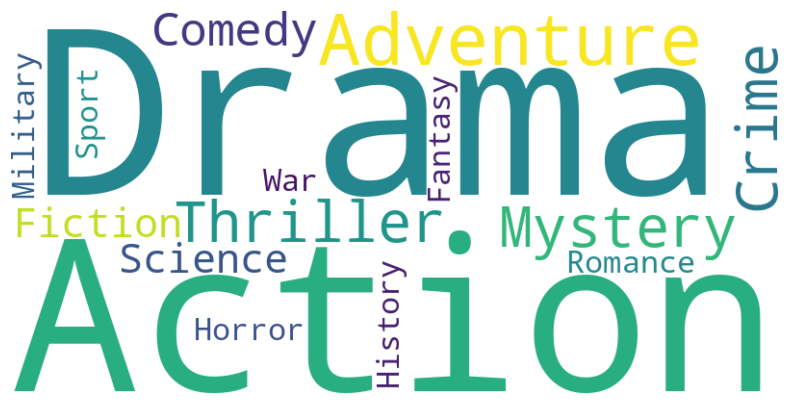

In [ ]:
# Top Movies Genres

all_genres = ' '.join(filtered_df_movies['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

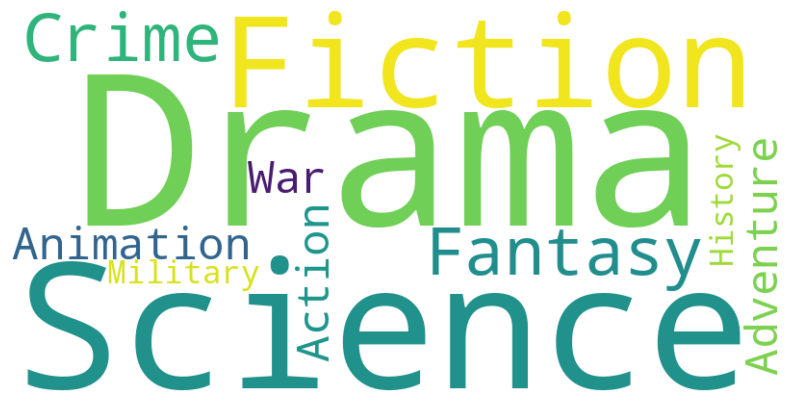

In [ ]:
# Top TV shows Genres

all_genres = ' '.join(filtered_df_tv_shows['Genre'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Funtion for Finding  Movies / Tv Shows Predominant Streaming Service

def visualize_streaming_distribution_wordcloud(df):
    # Filter streaming information available
    streaming_platforms = df[df['Streaming Platform'] != 'Not Available for Streaming.']['Streaming Platform']

    # Create a string of streaming platforms
    streaming_text = ' '.join(streaming_platforms)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Streaming Service Distribution - Word Cloud')
    plt.show()

    # Identify the predominant streaming service
    predominant_service = streaming_platforms.mode().iloc[0]
    print(f"The predominant streaming service is: {predominant_service}")


In [ ]:
#Let's Visvalize it using word cloud
# Visualizing Movies Predominant Streaming Platform using Word Cloud

#visualize_streaming_distribution_wordcloud(filtered_df_movies)
#No movie is streamed by any platform


The predominant streaming service is: Amazon Prime Video

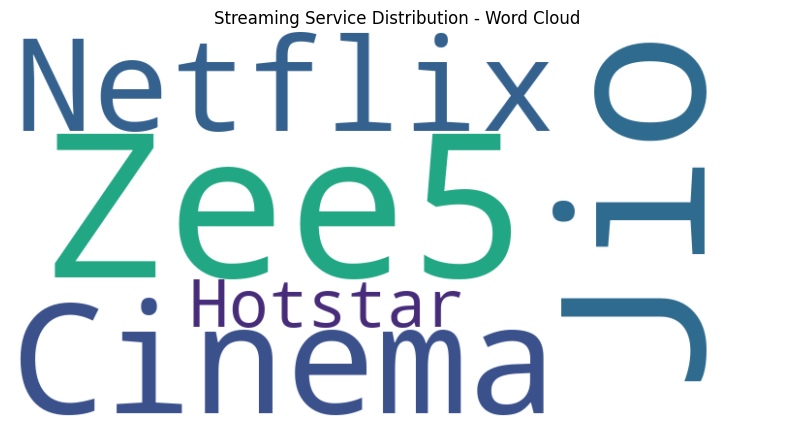

The predominant streaming service is: Hotstar


In [ ]:
# Visualizing Tv Shows Predominant Streaming Platform using Word Cloud

visualize_streaming_distribution_wordcloud(filtered_df_tv_shows)


## **Task 3 :- Data Export**

In [ ]:
# Saving Final Movies/Tv Shows dataframe as Final Data in csv format

df_movies.to_csv('Final_Movies_Data.csv', index=False)
df_tv_shows.to_csv('Final_Tv_Shows_Data.csv', index=False)


# Saving Filtered Movies/Tv Shows dataframe as Filtered Data in csv format

filtered_df_movies.to_csv('Filtered_Movies_Data.csv', index=False)
filtered_df_tv_shows.to_csv('Filtered_Tv_Shows_Data.csv', index=False)



# **Dataset Drive Link (View Access with Anyone) -**https://drive.google.com/drive/folders/1kCyGjOmBHDdHtuICwrmH3jlXguXPJshU?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***